In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_coordinates(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            x = float(parts[0])
            y = float(parts[1])
            coordinates.append([x, y])
    return np.asarray(coordinates)

In [ ]:
data=read_coordinates('/content/jain_feats.txt')
centroids=read_coordinates('/content/jain_centers.txt')

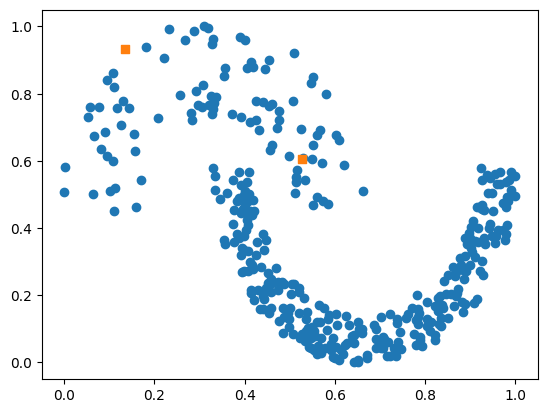

In [ ]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(centroids[:,0],centroids[:,1],marker='s')
plt.show()

In [ ]:
m,n=data.shape

In [ ]:
k=2
iteration=100

In [ ]:
for iter in range(iteration):
    attached_centroids=[]
    for i in range(k):
        attached_centroids.append([])
    for i in range(m):
        centers = []
        for j in range(k):
            euc=0
            for f in range(n):
                euc+=(centroids[j,f]-data[i,f])**2
            euc=np.sqrt(euc)
            centers.append(euc)
        closest_center=centers.index(min(centers))
        attached_centroids[closest_center].append(data[i])

    previous_loc=np.copy(centroids)
    for i in range(k):
        attached_sample=np.asarray(attached_centroids[i])
        num_sample=attached_sample.shape[0]
        new_location=np.sum(attached_sample,axis=0)/num_sample
        centroids[i]=new_location
    print("New Centroids:",centroids)
    if np.array_equal(previous_loc, centroids):
        print("Break.")
        break

New Centroids: [[0.2162762  0.78369478]
 [0.63806103 0.30517115]]
New Centroids: [[0.305398   0.73645694]
 [0.66933463 0.25255793]]
New Centroids: [[0.3393214  0.68788949]
 [0.6908414  0.22552467]]
New Centroids: [[0.34840708 0.6608605 ]
 [0.70476643 0.21518039]]
New Centroids: [[0.35321236 0.65135168]
 [0.70952747 0.21118785]]
New Centroids: [[0.35452312 0.64451968]
 [0.71329599 0.20955857]]
New Centroids: [[0.35657196 0.64102453]
 [0.71514538 0.20791714]]
New Centroids: [[0.35657196 0.64102453]
 [0.71514538 0.20791714]]
Break.


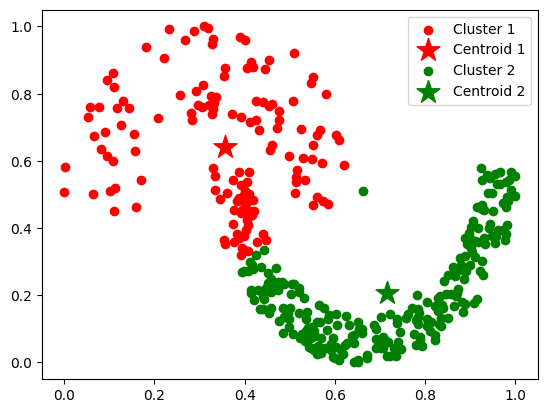

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
    cluster_data = np.asarray(attached_centroids[i])
    cluster_color = colors[i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=cluster_color, label=f'Cluster {i+1}')
    centroid_color = cluster_color
    plt.scatter(centroids[i, 0], centroids[i, 1], color=centroid_color, marker='*', s=300, label=f'Centroid {i+1}')
plt.legend()
plt.show()
